In [19]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import sys, time

sys.path.append('..')
from model.robot_body import body

%matplotlib inline

In [12]:
def add_bounding_box(ax, data):
    # need a bounding box on axes to get equal aspect ratio on 3d plots
    X, Y, Z = data.T
    max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0
    mid_x = (X.max()+X.min()) * 0.5
    mid_y = (Y.max()+Y.min()) * 0.5
    mid_z = (Z.max()+Z.min()) * 0.5
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)

ValueError: Argument dimensions are incompatible

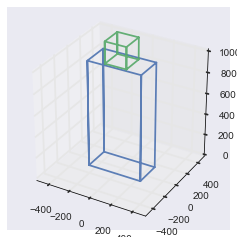

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

robot = body()

ax.plot(robot.body_points[:,0], robot.body_points[:,1], robot.body_points[:,2], alpha = 0.9)
ax.plot(robot.head_points[:,0], robot.head_points[:,1], robot.head_points[:,2], alpha = 0.9)
add_bounding_box(ax, robot.body_points)

x_top = robot.body_points[0:2,:]
x_bottom = robot.body_points[5:7,:]

ax.fill_between(x_top, x_bottom)

In [35]:
x_top, x_bottom

(array([[ 250.,  125.,    0.],
        [-250.,  125.,    0.]]), array([[  250.,   125.,  1000.],
        [ -250.,   125.,  1000.]]))

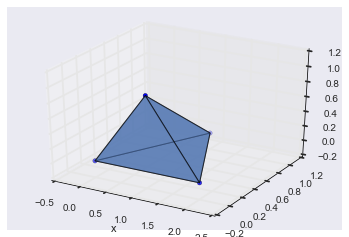

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0, 2, 1, 1]
y = [0, 0, 1, 0]
z = [0, 0, 0, 1]

vertices = [[0, 1, 2], [0, 1, 3], [0, 2, 3], [1, 2, 3]]

tupleList = list(zip(x, y, z))

poly3d = [[tupleList[vertices[ix][iy]] for iy in range(len(vertices[0]))] for ix in range(len(vertices))]
ax.scatter(x,y,z)
collection = Poly3DCollection(poly3d, linewidths=1, alpha=0.6)
# face_color = [0.5, 0.5, 1] # alternative: matplotlib.colors.rgb2hex([0.5, 0.5, 1])
# collection.set_facecolor(face_color)
ax.add_collection3d(collection)
plt.xlabel('x')

In [44]:
poly3d

[[(0, 0, 0), (2, 0, 0), (1, 1, 0)],
 [(0, 0, 0), (2, 0, 0), (1, 0, 1)],
 [(0, 0, 0), (1, 1, 0), (1, 0, 1)],
 [(2, 0, 0), (1, 1, 0), (1, 0, 1)]]